# Problem Statement: Breast Cancer Survival Prediction by machine learning

# Description:

### * Breast cancer originates in the breast and is the second most prevalent cancer in women, following skin cancer. While men can also develop breast cancer, it is significantly less frequent.


# 1. Importing Libraries 

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer
#Data Pipline
from sklearn.pipeline import Pipeline
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#Evaluation metrics
from sklearn.metrics import accuracy_score,classification_report
#ML models
from sklearn.linear_model import LogisticRegression,SGDRegressor
# metrics
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
import warnings

# 2. Load dataset:

In [63]:
data1=pd.read_csv("breast_cancer_data (1).csv")

In [64]:
data1

,Unnamed: 0,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# a. Datasets:
### We have a dataset of over 300 breast cancer patients who underwent surgery for the treatment of breast cancer. Below is the information on all columns in the dataset:

#### Patient_ID: ID of the patient

#### Age: Age of the patient

#### Gender: The gender of the patient

#### Protein1, Protein2, Protein3, Protein4: expression levels

#### Tumor_Stage: Breast cancer stage of the patient
#### Histology: Infiltrating Ductal Carcinoma, Infiltration Lobular Carcinoma, Mucinous Carcinoma
#### ER status: Positive/Negative
#### PR status: Positive/Negative
#### HER2 status: Positive/Negative
#### Surgery_type: Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other
#### DateofSurgery: The date of Surgery
#### DateofLast_Visit: The date of the last visit of the patient
#### Patient_Status: Alive/Dead

# 4. Summarize Data

## a) Descriptive statistics: 

In [65]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          341 non-null    int64  
 1   Patient_ID          334 non-null    object 
 2   Age                 334 non-null    float64
 3   Gender              334 non-null    object 
 4   Protein1            334 non-null    float64
 5   Protein2            334 non-null    float64
 6   Protein3            334 non-null    float64
 7   Protein4            334 non-null    float64
 8   Tumour_Stage        334 non-null    object 
 9   Histology           334 non-null    object 
 10  ER status           334 non-null    object 
 11  PR status           334 non-null    object 
 12  HER2 status         334 non-null    object 
 13  Surgery_type        334 non-null    object 
 14  Date_of_Surgery     334 non-null    object 
 15  Date_of_Last_Visit  317 non-null    object 
 16  Patient_

In [66]:
data1.head(10)

,Unnamed: 0,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.547150,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.614470,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.327470,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.193040,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.520450,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
5,5,TCGA-AO-A1KQ,84.0,MALE,-0.081872,1.72410,-0.057335,0.043025,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,18-Sep-17,15-Nov-21,Alive
6,6,TCGA-D8-A73X,53.0,FEMALE,-0.069535,1.41830,-0.361050,0.391580,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,04-Feb-17,07-Feb-18,Alive
7,7,TCGA-A7-A426,50.0,FEMALE,0.672490,1.27900,-0.321070,-0.112390,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,16-May-17,NaN,NaN
8,8,TCGA-EW-A1P5,77.0,FEMALE,-0.151750,-0.66332,1.189400,0.217180,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,28-Sep-17,28-Sep-18,Alive
9,9,TCGA-A8-A09A,40.0,FEMALE,-0.565700,1.26680,-0.293460,0.193950,II,Infiltrating Lobular Carcinoma,Positive,Positive,Positive,Other,14-Feb-17,15-Dec-17,Alive


In [67]:
data1.describe()

,Unnamed: 0,Age,Protein1,Protein2,Protein3,Protein4
count,341.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,170.000000,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,98.582453,12.961212,0.563588,0.911637,0.585175,0.629055
min,0.000000,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,85.000000,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,170.000000,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,255.000000,68.000000,0.343598,1.627900,0.278353,0.425630
max,340.000000,90.000000,1.593600,3.402200,2.193400,1.629900


#### Breast cancer is mostly found in females, so let’s have a look at the Gender column to see how many females and males are there: 

In [68]:
# Check the Count of all pistachio classes
print(data1['Gender'].value_counts())

FEMALE    330
MALE        4
Name: Gender, dtype: int64


## b) Data visualizations: 

<Axes: xlabel='Gender', ylabel='count'>

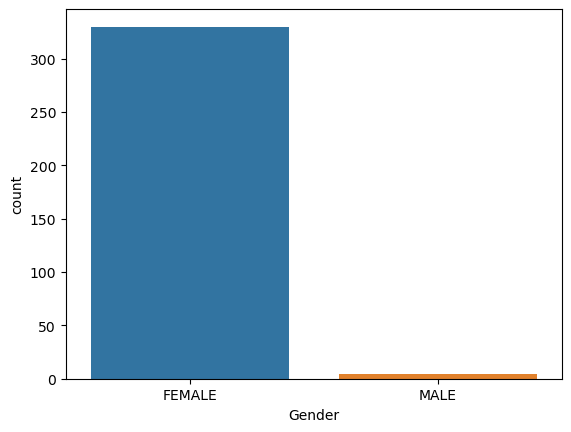

In [69]:
sns.countplot(x='Gender', data=data1)

In [70]:
corr_matrix=data1.corr()
corr_matrix

C:\Users\Alalwai\AppData\Local\Temp\ipykernel_6380\2044443352.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data1.corr()


,Unnamed: 0,Age,Protein1,Protein2,Protein3,Protein4
Unnamed: 0,1.000000,-0.010956,0.002887,0.050275,0.079205,-0.010961
Age,-0.010956,1.000000,-0.050638,-0.021542,-0.039686,0.094214
Protein1,0.002887,-0.050638,1.000000,0.238141,-0.129482,0.280343
Protein2,0.050275,-0.021542,0.238141,1.000000,-0.415825,0.088239
Protein3,0.079205,-0.039686,-0.129482,-0.415825,1.000000,0.065316
Protein4,-0.010961,0.094214,0.280343,0.088239,0.065316,1.000000


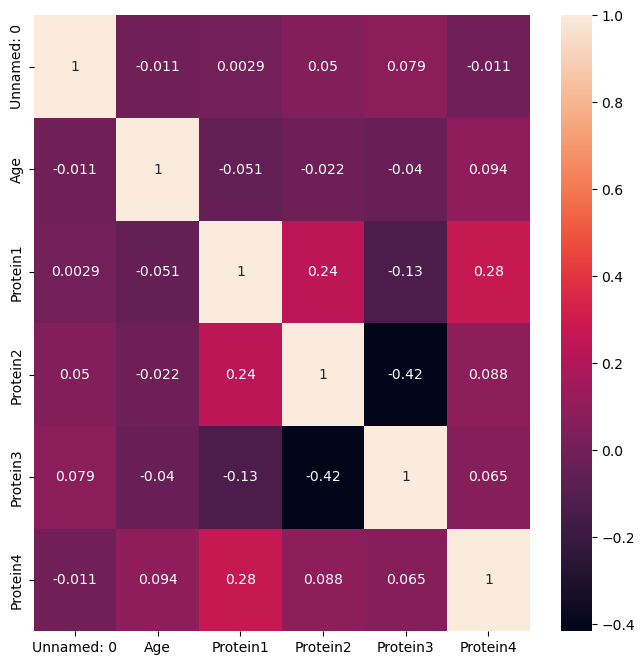

In [71]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

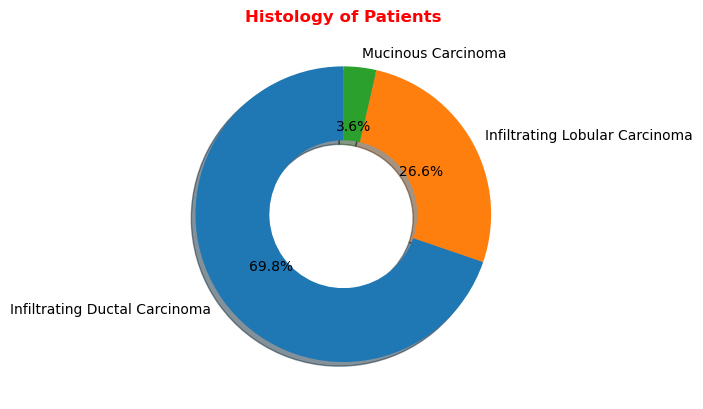

In [72]:
# Get the data
histology = data1["Histology"].value_counts()
transactions = histology.index
quantity = histology.values

# Create the pie chart
plt.pie(quantity, labels=transactions, autopct="%1.1f%%", shadow=True, startangle=90, wedgeprops={"width": 0.5})

# Add a title
plt.title("Histology of Patients",weight='bold',color='red')

# Show the plot
plt.show()

# 3. Prepare Data:

## a) Data Cleaning: 

In [73]:
# Drop columns "Patient_ID", "Date_of_Surgery", and "Date_of_Last_Visit"
columns_to_drop = ["Patient_ID", "Date_of_Surgery", "Date_of_Last_Visit","Unnamed: 0","Gender"]
data2 = data1.drop(columns=columns_to_drop)

In [74]:
data2

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36.0,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
1,43.0,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
2,69.0,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
3,56.0,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
4,56.0,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
#Test if there is a missing value
data2.isnull().sum()

Age                7
Protein1           7
Protein2           7
Protein3           7
Protein4           7
Tumour_Stage       7
Histology          7
ER status          7
PR status          7
HER2 status        7
Surgery_type       7
Patient_Status    20
dtype: int64

In [76]:
# Drop rows with null (NaN) values
data2.dropna(inplace=True)

In [77]:
#Test if there is a missing value after drop
data2.isnull().sum()

Age               0
Protein1          0
Protein2          0
Protein3          0
Protein4          0
Tumour_Stage      0
Histology         0
ER status         0
PR status         0
HER2 status       0
Surgery_type      0
Patient_Status    0
dtype: int64

In [78]:
data2

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36.0,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
1,43.0,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
2,69.0,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
3,56.0,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
4,56.0,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...
329,36.0,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,Dead
330,44.0,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,Dead
331,61.0,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
332,79.0,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,Dead


# 5. Data Encoding: 

In [79]:
data2["Tumour_Stage"] = data2["Tumour_Stage"].map({"I": 1, "II": 2, "III": 3})
data2["Histology"] = data2["Histology"].map({"Infiltrating Ductal Carcinoma": 1, 
                                           "Infiltrating Lobular Carcinoma": 2, "Mucinous Carcinoma": 3})
data2["ER status"] = data2["ER status"].map({"Positive": 1})
data2["Patient_Status"] = data2["Patient_Status"].map({"Alive":1 ,"Dead":2})
data2["PR status"] = data2["PR status"].map({"Positive": 1})
data2["HER2 status"] = data2["HER2 status"].map({"Positive": 1, "Negative": 2})
#data2["Gender"] = data2["Gender"].map({"MALE": 0, "FEMALE": 1})
data2["Surgery_type"] = data2["Surgery_type"].map({"Other": 1, "Modified Radical Mastectomy": 2, 
                                                 "Lumpectomy": 3, "Simple Mastectomy": 4})
print(data2.head())

    Age  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  Histology  \
0  36.0  0.080353   0.42638   0.54715  0.273680             3          1   
1  43.0 -0.420320   0.57807   0.61447 -0.031505             2          3   
2  69.0  0.213980   1.31140  -0.32747 -0.234260             3          1   
3  56.0  0.345090  -0.21147  -0.19304  0.124270             2          1   
4  56.0  0.221550   1.90680   0.52045 -0.311990             2          1   

   ER status  PR status  HER2 status  Surgery_type  Patient_Status  
0          1          1            2             2               1  
1          1          1            2             3               2  
2          1          1            2             1               1  
3          1          1            2             2               1  
4          1          1            2             1               2  


# 6. Model Training:

In [80]:
data2

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36.0,0.080353,0.42638,0.54715,0.273680,3,1,1,1,2,2,1
1,43.0,-0.420320,0.57807,0.61447,-0.031505,2,3,1,1,2,3,2
2,69.0,0.213980,1.31140,-0.32747,-0.234260,3,1,1,1,2,1,1
3,56.0,0.345090,-0.21147,-0.19304,0.124270,2,1,1,1,2,2,1
4,56.0,0.221550,1.90680,0.52045,-0.311990,2,1,1,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
329,36.0,0.231800,0.61804,-0.55779,-0.517350,3,1,1,1,1,4,2
330,44.0,0.732720,1.11170,-0.26952,-0.354920,2,2,1,1,2,1,2
331,61.0,-0.719470,2.54850,-0.15024,0.339680,2,1,1,1,2,3,2
332,79.0,0.479400,2.05590,-0.53136,-0.188480,1,1,1,1,1,3,2


In [81]:
feature_cols =['Age', 'Protein1', 'Protein2', 'Protein3','Protein4', 
                   'Tumour_Stage', 'Histology', 'ER status', 'PR status', 
                   'HER2 status', 'Surgery_type']

In [82]:
X = data2[feature_cols] # Features
y = data2.Patient_Status # Target variable

In [83]:
X

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type
0,36.0,0.080353,0.42638,0.54715,0.273680,3,1,1,1,2,2
1,43.0,-0.420320,0.57807,0.61447,-0.031505,2,3,1,1,2,3
2,69.0,0.213980,1.31140,-0.32747,-0.234260,3,1,1,1,2,1
3,56.0,0.345090,-0.21147,-0.19304,0.124270,2,1,1,1,2,2
4,56.0,0.221550,1.90680,0.52045,-0.311990,2,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
329,36.0,0.231800,0.61804,-0.55779,-0.517350,3,1,1,1,1,4
330,44.0,0.732720,1.11170,-0.26952,-0.354920,2,2,1,1,2,1
331,61.0,-0.719470,2.54850,-0.15024,0.339680,2,1,1,1,2,3
332,79.0,0.479400,2.05590,-0.53136,-0.188480,1,1,1,1,1,3


In [84]:
y

0      1
1      2
2      1
3      1
4      2
      ..
329    2
330    2
331    2
332    2
333    2
Name: Patient_Status, Length: 321, dtype: int64

In [85]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Data modeling

# Decision Trees:  

In [86]:
def best_param(model, parameter):
  grid_search=GridSearchCV(model,parameter,scoring='accuracy',cv=10, n_jobs= -1)
  grid_search.fit(X_train,y_train)
  #l=[*parameter]
  #return the best parameter
  return grid_search.best_params_

In [87]:
#min_samples_split
model=tree.DecisionTreeClassifier()
parameters={'min_samples_split':list(range(10,70,10))}
best_param(model,parameters)

{'min_samples_split': 50}

### Frist Decision Trees:

In [88]:
DTM_pipline=Pipeline([
    ("clf", tree.DecisionTreeClassifier(min_samples_split=50)) #estimator
])

In [89]:
DTM_pipline.fit(X_train,y_train)

Pipeline(steps=[('clf', DecisionTreeClassifier(min_samples_split=50))])

In [90]:
y_pred = DTM_pipline.predict(X_test)


In [91]:
#calculate the accuaracy
DTM_accuracy=accuracy_score(y_test,y_pred)
DTM_accuracy

0.6907216494845361

In [92]:
target=['Alive', 'Dead']
LR_CR=classification_report(y_test,y_pred,target_names=target)
print(LR_CR)

              precision    recall  f1-score   support

       Alive       0.75      0.88      0.81        73
        Dead       0.25      0.12      0.17        24

    accuracy                           0.69        97
   macro avg       0.50      0.50      0.49        97
weighted avg       0.63      0.69      0.65        97



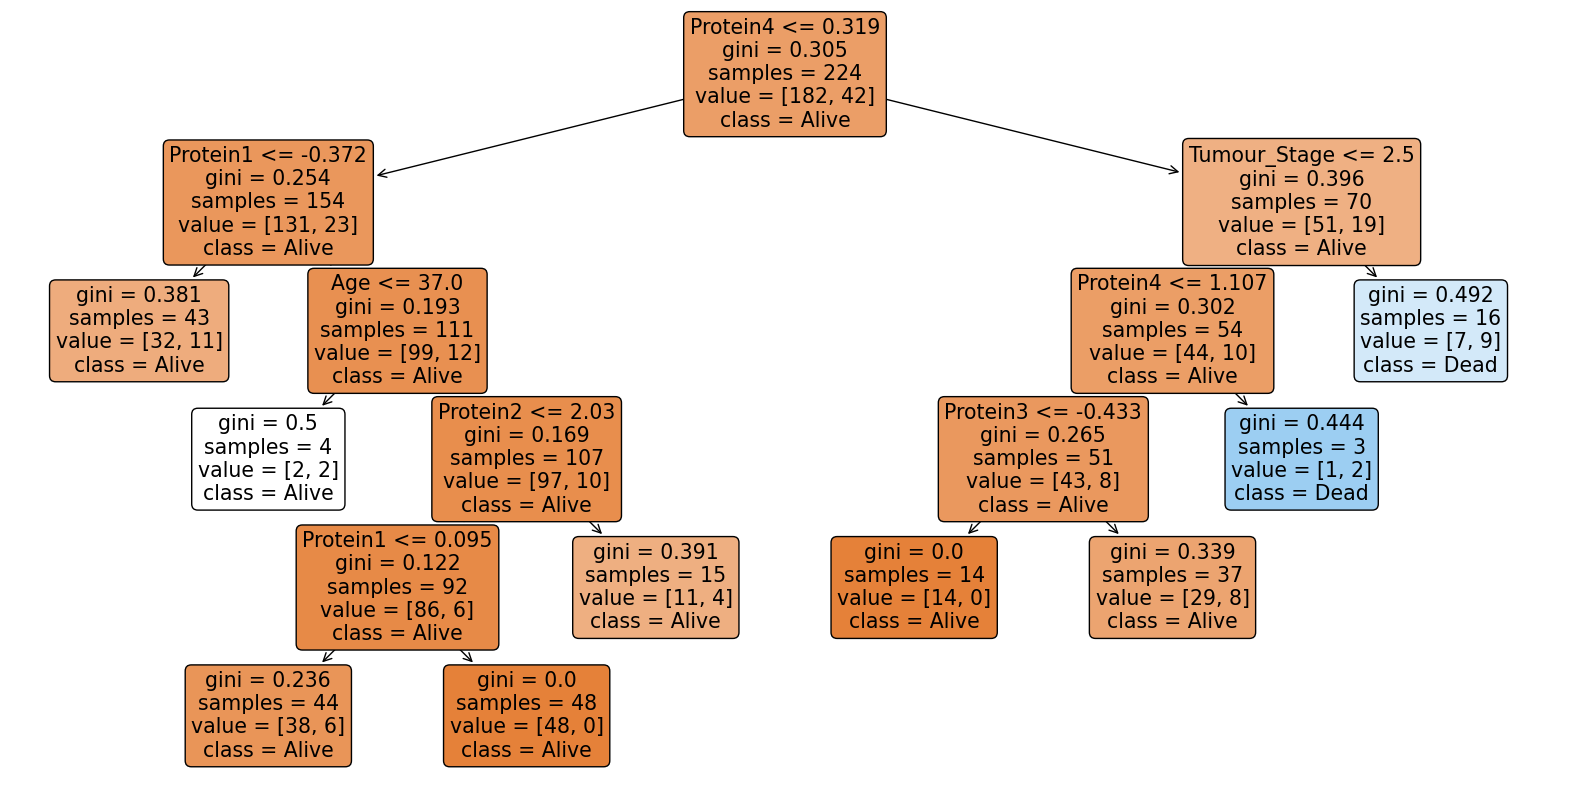

In [93]:

plt.figure(figsize=(20, 10))
tree.plot_tree(DTM_pipline.named_steps['clf'], 
         feature_names=data2.columns, 
         class_names=['Alive', 'Dead'], 
         filled=True, 
         rounded=True)

plt.show()

In [94]:
DTM_pipline.named_steps['clf'].feature_importances_

array([0.10711767, 0.18540858, 0.08797436, 0.0798115 , 0.24432712,
       0.29536076, 0.        , 0.        , 0.        , 0.        ,
       0.        ])

### Second Decision Trees with limited or importances feature: 

In [95]:
def best_param(model, parameter):
  grid_search=GridSearchCV(model,parameter,scoring='accuracy',cv=10, n_jobs= -1)
  grid_search.fit(X_train1,y_train1)
  #l=[*parameter]
  #return the best parameter
  return grid_search.best_params_

In [96]:
#min_samples_split
model=tree.DecisionTreeClassifier()
parameters={'min_samples_split':list(range(10,70,10))}
best_param(model,parameters)

{'min_samples_split': 50}

In [97]:
# The previous code explains what are the most important features used in Decision Trees:
feature_cols1 =['Age',  'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage']

In [98]:
X1 = data2[feature_cols1] # Features 
y1 = data2.Patient_Status # Target variable

X1

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage
0,36.0,0.080353,0.42638,0.54715,0.273680,3
1,43.0,-0.420320,0.57807,0.61447,-0.031505,2
2,69.0,0.213980,1.31140,-0.32747,-0.234260,3
3,56.0,0.345090,-0.21147,-0.19304,0.124270,2
4,56.0,0.221550,1.90680,0.52045,-0.311990,2
...,...,...,...,...,...,...
329,36.0,0.231800,0.61804,-0.55779,-0.517350,3
330,44.0,0.732720,1.11170,-0.26952,-0.354920,2
331,61.0,-0.719470,2.54850,-0.15024,0.339680,2
332,79.0,0.479400,2.05590,-0.53136,-0.188480,1


In [99]:
# Split dataset into training set and test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=1) # 70% training and 30% test

In [100]:
DTM_pipline1=Pipeline([
    ("clf1", tree.DecisionTreeClassifier(min_samples_split=50)) #estimator
])
#clf1 = DecisionTreeClassifier()

In [101]:
# Train Decision Tree Classifier
DTM_pipline1.fit(X_train1,y_train1)

Pipeline(steps=[('clf1', DecisionTreeClassifier(min_samples_split=50))])

In [102]:
y_pred1 = DTM_pipline1.predict(X_test1)

In [103]:
#calculate the accuaracy
DTM_accuracy1=accuracy_score(y_test1,y_pred1)
DTM_accuracy1

0.6907216494845361

In [104]:
target1=['Alive', 'Dead']
LR_CR=classification_report(y_test1,y_pred1,target_names=target1)
print(LR_CR)

              precision    recall  f1-score   support

       Alive       0.75      0.88      0.81        73
        Dead       0.25      0.12      0.17        24

    accuracy                           0.69        97
   macro avg       0.50      0.50      0.49        97
weighted avg       0.63      0.69      0.65        97



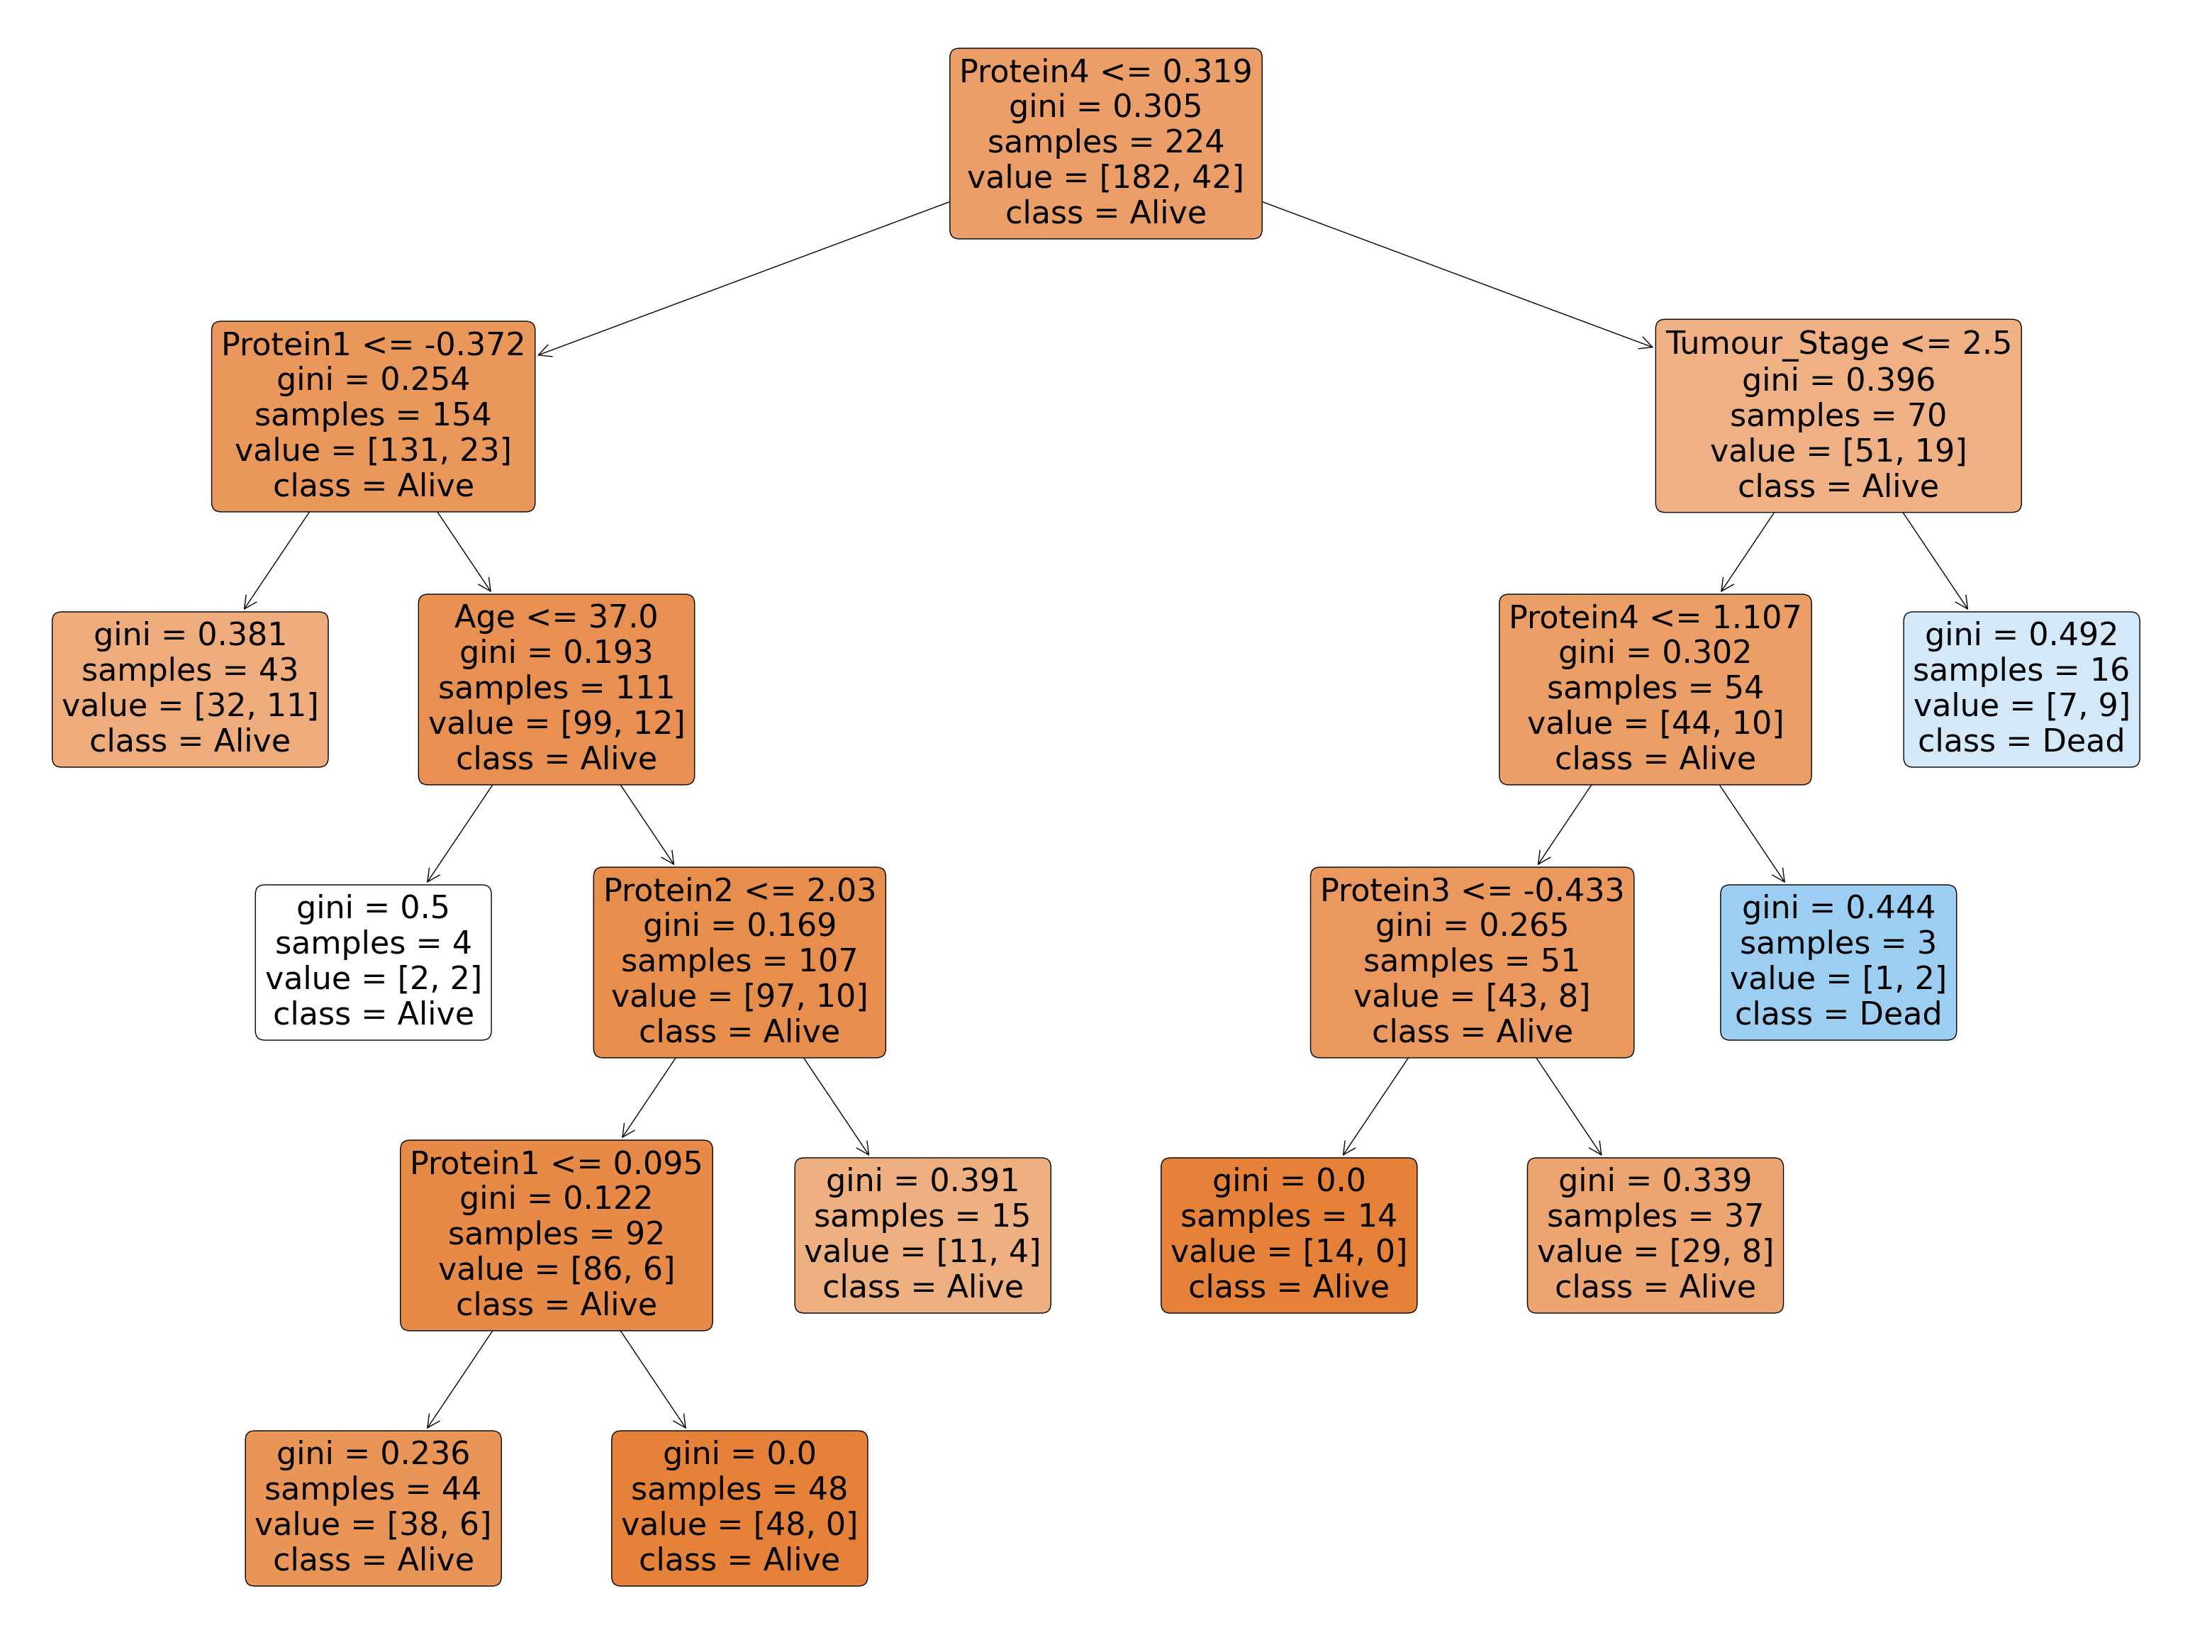

In [105]:
plt.figure(figsize=(40, 30))
tree.plot_tree(DTM_pipline1.named_steps['clf1'], 
         feature_names=data2.columns, 
         class_names=['Alive', 'Dead'], 
         filled=True, 
         rounded=True)

plt.show()

In [106]:
cm1= metrics.confusion_matrix(y_test1,y_pred1)
print(cm1)

[[64  9]
 [21  3]]


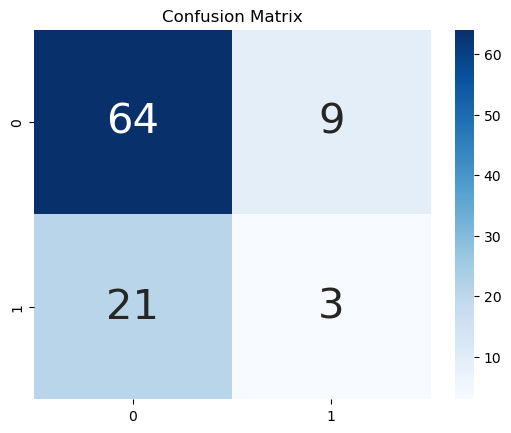

In [107]:
ax = plt.axes()
df_cm = cm1
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

# Logistic Regression:

In [109]:
#find the best C using grid search
#'C' is the regularization parameter, which controls the strength of regularization in the logistic regression model.
#Regularization is a technique used to prevent overfitting in machine learning models
model=LogisticRegression()
C_parms={'C':np.arange(0, 2.0, 0.01)}
best_param(model,C_parms)

C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Alalwai\anacond

{'C': 0.01}

In [110]:
LogisticRegression_pipline=Pipeline([
    ("model", LogisticRegression(C=0.01)) #estimator
])


In [111]:
LogisticRegression_pipline.fit(X_train1,y_train1)

Pipeline(steps=[('model', LogisticRegression(C=0.01))])

In [112]:
#predict testing data
y_pred2 = LogisticRegression_pipline.predict(X_test1)

In [113]:
score = LogisticRegression_pipline.score(X_test1, y_test1)
print(score)

0.7525773195876289


In [114]:
cm2 = metrics.confusion_matrix(y_test1,y_pred2)
print(cm2)

[[73  0]
 [24  0]]


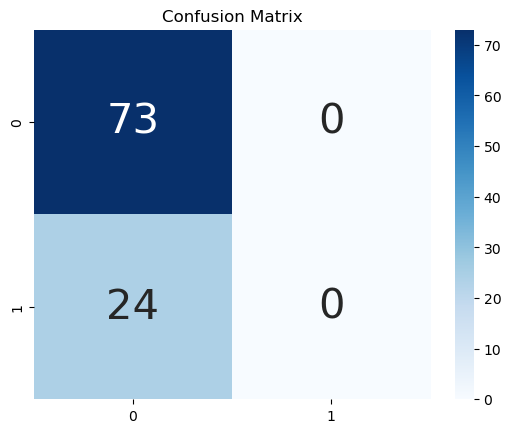

In [115]:
ax = plt.axes()
df_cm = cm2
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [116]:
target2=['Alive', 'Dead']
LR_CR=classification_report(y_test1,y_pred2,target_names=target2)
print(LR_CR)

              precision    recall  f1-score   support

       Alive       0.75      1.00      0.86        73
        Dead       0.00      0.00      0.00        24

    accuracy                           0.75        97
   macro avg       0.38      0.50      0.43        97
weighted avg       0.57      0.75      0.65        97



C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Ensembles: 

In [117]:
#logisticRegr = LogisticRegression()
#clf1 = DecisionTreeClassifier()


In [118]:
voting_clf = VotingClassifier(
    estimators=[('lr', LogisticRegression_pipline), ('dt', DTM_pipline1)],
    voting='hard')

In [119]:
voting_clf.fit(X_train1, y_train1)

VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('model',
                                               LogisticRegression(C=0.01))])),
                             ('dt',
                              Pipeline(steps=[('clf1',
                                               DecisionTreeClassifier(min_samples_split=50))]))])

In [120]:
for clf in (LogisticRegression_pipline,voting_clf,DTM_pipline1):
    clf.fit(X_train1, y_train1)
    y_pred3 = clf.predict(X_test1)
    print(clf.__class__.__name__, accuracy_score(y_test1, y_pred3))

Pipeline 0.7525773195876289
VotingClassifier 0.7525773195876289
Pipeline 0.6907216494845361


# Training Machine Learning Model:

In [121]:
model=SVC()
model.fit(X_train1,y_train1)

SVC()

In [122]:
#feature_cols1 =['Age',  'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage']
features_t = np.array([[56,0.22155,1.9068,0.52045,-0.31199,2]])
print(model.predict(features_t))

#"Alive" TP in database and TN in model

[1]


C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [123]:
#feature_cols1 =['Age',  'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage']
features_t = np.array([[46,-0.055036,-0.50643,0.88778,-0.089424,2]])

print(model.predict(features_t))

#"Dead" 

[1]


C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
